In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from time import sleep
from copy import deepcopy
from bs4 import BeautifulSoup as bs
import requests

sns.set(rc = {'figure.figsize': (12, 6)})

# Data Cleaning & Missing Values

### Load the Data

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/ReDI-School/data-analytics/master/Class%20material/Class-11_Data_cleaning/berlin_housing_with_scraped.csv')

In [22]:
df.iloc[:,7:].head()

,cold_rent,utilities,heating_costs,security_deposit,parking_space,renovated_date,property_condition,furnishing,heating_type,energy_sources,energy_certificate,type_of_certificate,energy_requirement,efficiency_class,tags
0,2.199€,+460€,in,3,120€,NaN,New,NaN,Underfloor Heating,NaN,NaN,Bedarfsausweis,NaN,B,"['Balkon', 'Terrasse Balkon', 'Terrasse Person..."
1,"973,51€","+226,49€",in,"2920,53",NaN,NaN,New,Gehobene Qualität,Central Heating,Fernwärme Energieausweis liegt vor,liegt vor,NaN,NaN,NaN,"['Balkon', 'Terrasse Balkon', 'Terrasse Person..."
2,799€,+90€,+90€,Drei,NaN,NaN,Groomed,Normale Qualität,Central Heating,Fernwärme Energieausweis liegt vor,liegt vor,Verbrauchsausweis Energie­ver­brauchs­kennwert...,NaN,NaN,"['Balkon', 'Terrasse Balkon', 'Terrasse Person..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Balkon', 'Terrasse Balkon', 'Terrasse Person..."
4,NaN,NaN,NaN,NaN,NaN,NaN,New,Gehobene Qualität,Central Heating,Fernwärme Energieausweis liegt zur Besichtigun...,liegt zur Besichtigung vor,NaN,NaN,NaN,"['Balkon', 'Terrasse Balkon', 'Terrasse Person..."


#### Translate

In [23]:
# heating_type_map = {
#     'Fußbodenheizung': 'Underfloor Heating',
#     'Zentralheizung': 'Central Heating',
#     'Fernwärme': 'District Heating',
#     'Etagenheizung': 'Floor Heating',
#     'Fernwärme Energieausweis liegt vor': 'District Heating',
#     'Zentralheizung Energieausweis liegt vor': 'Central Heating',
#     'Fernwärme Energieausweis liegt zur Besichtigung vor': 'District Heating',
#     'Gas-Heizung': 'Gas Heating',
#     'Etagenheizung Energieausweis liegt vor': 'Floor Heating',
#     'Fernwärme Energieausweis laut Gesetz nicht erforderlich': 'District Heating',
#     'Fußbodenheizung Energieausweis laut Gesetz nicht erforderlich': 'Underfloor Heating',
#     'Fußbodenheizung Energieausweis liegt zur Besichtigung vor': 'Underfloor Heating',
#     'Blockheizkraftwerke': 'CHP Plants',
#     'Fußbodenheizung Energieausweis liegt vor': 'Underfloor Heating',
#     'Zentralheizung Energieausweis liegt zur Besichtigung vor': 'Central Heating',
#     'Gas-Heizung Energieausweis liegt vor': 'Gas Heating',
#     'Holz-Pelletheizung': 'Wood Pellet Heating',
# }

# df['heating_type'] = df.heating_type.apply(lambda x: heating_type_map.get(x, np.nan))

# pc_map = {
#     'Erstbezug': 'New',
#     'Gepflegt': 'Groomed',
#     'Neuwertig': 'Mint Condition',
#     'Vollständig renoviert': 'Completely Renovated',
#     'Erstbezug nach Sanierung': 'After Renovation',
#     'Modernisiert': 'Modernized',
#     'Renovierungsbedürftig': 'Needs Renovation',
#     'Saniert': 'Refurbished',
#     'Gepflegt Energieausweis liegt vor': 'Well Maintained',
# }

# df['property_condition'] = df.property_condition.apply(lambda x: pc_map.get(x, np.nan))

### Check the Data's `shape`,  `head`, and the `dtypes`

In [24]:
df.shape

(764, 22)

In [25]:
df.head(3)

,url,region,condition,rooms,rent,year_construction,space,cold_rent,utilities,heating_costs,...,renovated_date,property_condition,furnishing,heating_type,energy_sources,energy_certificate,type_of_certificate,energy_requirement,efficiency_class,tags
0,https://www.immobilienscout24.de/expose/116051687,Mitte,first_time_use,4.0,2659.0,2019,117.20,2.199€,+460€,in,...,NaN,New,NaN,Underfloor Heating,NaN,NaN,Bedarfsausweis,NaN,B,"['Balkon', 'Terrasse Balkon', 'Terrasse Person..."
1,https://www.immobilienscout24.de/expose/115338103,Kreuzberg,first_time_use,1.0,1200.0,2020,29.33,"973,51€","+226,49€",in,...,NaN,New,Gehobene Qualität,Central Heating,Fernwärme Energieausweis liegt vor,liegt vor,NaN,NaN,NaN,"['Balkon', 'Terrasse Balkon', 'Terrasse Person..."
2,https://www.immobilienscout24.de/expose/116458710,Köpenick,well_kept,2.0,979.0,1997,83.61,799€,+90€,+90€,...,NaN,Groomed,Normale Qualität,Central Heating,Fernwärme Energieausweis liegt vor,liegt vor,Verbrauchsausweis Energie­ver­brauchs­kennwert...,NaN,NaN,"['Balkon', 'Terrasse Balkon', 'Terrasse Person..."


In [26]:
df.dtypes

url                     object
region                  object
condition               object
rooms                  float64
rent                   float64
year_construction        int64
space                  float64
cold_rent               object
utilities               object
heating_costs           object
security_deposit        object
parking_space           object
renovated_date         float64
property_condition      object
furnishing              object
heating_type            object
energy_sources          object
energy_certificate      object
type_of_certificate     object
energy_requirement      object
efficiency_class        object
tags                    object
dtype: object

### First Question: Is there missing data? If yes, how much?

In [27]:
df.parking_space.dropna()

0      120€
10     120€
15     150€
19     120€
29     150€
       ... 
692     75€
703    150€
727    120€
733    150€
734    100€
Name: parking_space, Length: 90, dtype: object

In [28]:
(df.isnull().sum() / len(df)).sort_values(ascending = False)

parking_space          0.882199
renovated_date         0.744764
efficiency_class       0.671466
energy_requirement     0.573298
security_deposit       0.496073
heating_costs          0.442408
cold_rent              0.442408
utilities              0.442408
furnishing             0.417539
energy_certificate     0.409686
type_of_certificate    0.388743
energy_sources         0.353403
property_condition     0.344241
heating_type           0.325916
rooms                  0.000000
region                 0.000000
condition              0.000000
tags                   0.000000
rent                   0.000000
year_construction      0.000000
space                  0.000000
url                    0.000000
dtype: float64

## Clean `tags`

At first glance, the data seems a bit odd (there is no difference between the first few rows), so let's look here to see if there is an easy win.

In [29]:
df.tags.unique()[0]

"['Balkon', 'Terrasse Balkon', 'Terrasse Personenaufzug Personenaufzug Einbauküche Einbauküche']"

In [30]:
df.rooms.unique()

array([4. , 1. , 2. , 3. , 3.5, 2.5, 5. , 1.5, 7. , 6. , 4.5])

**Because there is only one value for `tags` one can assume that there was probably something wrong. For that reason, we can probably drop the column**

In [31]:
df.drop('tags', axis = 1, inplace = True)

In [32]:
df.head(3)

,url,region,condition,rooms,rent,year_construction,space,cold_rent,utilities,heating_costs,...,parking_space,renovated_date,property_condition,furnishing,heating_type,energy_sources,energy_certificate,type_of_certificate,energy_requirement,efficiency_class
0,https://www.immobilienscout24.de/expose/116051687,Mitte,first_time_use,4.0,2659.0,2019,117.20,2.199€,+460€,in,...,120€,NaN,New,NaN,Underfloor Heating,NaN,NaN,Bedarfsausweis,NaN,B
1,https://www.immobilienscout24.de/expose/115338103,Kreuzberg,first_time_use,1.0,1200.0,2020,29.33,"973,51€","+226,49€",in,...,NaN,NaN,New,Gehobene Qualität,Central Heating,Fernwärme Energieausweis liegt vor,liegt vor,NaN,NaN,NaN
2,https://www.immobilienscout24.de/expose/116458710,Köpenick,well_kept,2.0,979.0,1997,83.61,799€,+90€,+90€,...,NaN,NaN,Groomed,Normale Qualität,Central Heating,Fernwärme Energieausweis liegt vor,liegt vor,Verbrauchsausweis Energie­ver­brauchs­kennwert...,NaN,NaN


## Clean `security_deposit`

In [33]:
df.security_deposit.value_counts()

3           123
Drei         13
Kaution:      7
3-fache       5
4350          3
           ... 
2990          1
3204          1
3159,00       1
1074,60€      1
1.727,76      1
Name: security_deposit, Length: 216, dtype: int64

In [34]:
df.security_deposit.unique()

array(['3', '2920,53', 'Drei', nan, '2400', '3507.42', '2000', '2139.78',
       '5.397,00', '3885,00', '7.950,00', '4152', '4.650,00', '1.500€',
       '3x', '9.150,-', '4.545', '2xNKM', '6.900,00', '5.994,00',
       '6.000,-', '7.470,00', '5.172,00', '2.145,00', '6.215,70',
       '11.475,00', '14.850,00', '4.197,00', '2600,00', '12.900,00', '2',
       '3450', '5000', '10.000', '3620', '1690', '1790', 'ja', '2990',
       '1490', '9.960,00', '3159,00', '4.350,00', '5010', '4333,90',
       '3000', '2.013,00', '2841', '4000', '2850.72', '3300.75', '2344',
       '3645,00', '2397', '4500', '9.718,00', '3.597,00', '3900',
       '3.780,00', '4800', '3.582', '3630', '2549.79', '3831', '2.274,00',
       '2850', '2960', '4.680', '4350', '3500', '4080', '4050', '2338',
       '5940,00', '8100', '3.859,17', '2.630,43', '6552', '2.700,00',
       '1797,00', '3345', '3360', '5148', '2472', '12.000,00', '6.300,00',
       '5.394,00€', '1.554,00', '6600€', '1.727,76', '9025,50',
       '3.750

**First, let's remove the currency**

In [35]:
def rm_euro(security_deposit):
    
    # return NaN if value is missing
    if pd.isna(security_deposit): return np.nan
    
    # cast to string so that string methods work
    security_deposit = str(security_deposit)
    
    # remove different instances of euro
    euros = ['€', 'euro', 'eur']
    for euro in euros:
        security_deposit = security_deposit.lower().replace(euro, '').strip()
    
    return security_deposit

In [36]:
df['security_deposit'] = df.security_deposit.apply(rm_euro).astype(str)

In [37]:
df.security_deposit.unique()

array(['3', '2920,53', 'drei', 'nan', '2400', '3507.42', '2000',
       '2139.78', '5.397,00', '3885,00', '7.950,00', '4152', '4.650,00',
       '1.500', '3x', '9.150,-', '4.545', '2xnkm', '6.900,00', '5.994,00',
       '6.000,-', '7.470,00', '5.172,00', '2.145,00', '6.215,70',
       '11.475,00', '14.850,00', '4.197,00', '2600,00', '12.900,00', '2',
       '3450', '5000', '10.000', '3620', '1690', '1790', 'ja', '2990',
       '1490', '9.960,00', '3159,00', '4.350,00', '5010', '4333,90',
       '3000', '2.013,00', '2841', '4000', '2850.72', '3300.75', '2344',
       '3645,00', '2397', '4500', '9.718,00', '3.597,00', '3900',
       '3.780,00', '4800', '3.582', '3630', '2549.79', '3831', '2.274,00',
       '2850', '2960', '4.680', '4350', '3500', '4080', '4050', '2338',
       '5940,00', '8100', '3.859,17', '2.630,43', '6552', '2.700,00',
       '1797,00', '3345', '3360', '5148', '2472', '12.000,00', '6.300,00',
       '5.394,00', '1.554,00', '6600', '1.727,76', '9025,50', '3.750,00',
  

**Now, we need to convert the decimal into something a computer can better read**

In [38]:
def convert_decimal(value):
    conv = lambda v: v.replace('.', '').replace(',', '.')
    
    if pd.isna(value):                 return np.nan       # return NaN if missing
    if len(value.split('.')[-1]) == 3: return conv(value)  # check if wrong format w/o decimal i.e. 3.500
    try:                               return float(value) # check if value is already in correct format
    except:                            return conv(value)  # if not, convert it (i.e. 3.500,99)

In [39]:
df['security_deposit'] = df.security_deposit.apply(convert_decimal)

In [40]:
df.security_deposit.unique()

array([3.0, '2920.53', 'drei', 'nan', 2400.0, 3507.42, 2000.0, 2139.78,
       '5397.00', '3885.00', '7950.00', 4152.0, '4650.00', '1500', '3x',
       '9150.-', '4545', '2xnkm', '6900.00', '5994.00', '6000.-',
       '7470.00', '5172.00', '2145.00', '6215.70', '11475.00', '14850.00',
       '4197.00', '2600.00', '12900.00', 2.0, 3450.0, 5000.0, '10000',
       3620.0, 1690.0, 1790.0, 'ja', 2990.0, 1490.0, '9960.00', '3159.00',
       '4350.00', 5010.0, '4333.90', 3000.0, '2013.00', 2841.0, 4000.0,
       2850.72, 3300.75, 2344.0, '3645.00', 2397.0, 4500.0, '9718.00',
       '3597.00', 3900.0, '3780.00', 4800.0, '3582', 3630.0, 2549.79,
       3831.0, '2274.00', 2850.0, 2960.0, '4680', 4350.0, 3500.0, 4080.0,
       4050.0, 2338.0, '5940.00', 8100.0, '3859.17', '2630.43', 6552.0,
       '2700.00', '1797.00', 3345.0, 3360.0, 5148.0, 2472.0, '12000.00',
       '6300.00', '5394.00', '1554.00', 6600.0, '1727.76', '9025.50',
       '3750.00', 7575.0, '7650.00', '5355.00', 5850.0, '4170.00',

**And now, let's get a list of non-numeric values**

In [41]:
str_sec_dep = []

for uniq in df.security_deposit.unique():
    try:    uniq = float(uniq)
    except: str_sec_dep.append(uniq)

In [42]:
set(str_sec_dep)

{'2xnkm',
 '3-fache',
 '3nkm',
 '3x',
 '6000.-',
 '9150.-',
 'drei',
 'ja',
 'kaution',
 'kaution:'}

**Build a map of what the values should be. This is manually set because it's a small amount of data.**

In [43]:
sec_dep_map = {
    '2xnkm': '2 Months',
    '3-fache': '3 Months',
    '3nkm': '3 Months',
    '3x': '3 Months',
    '6000.-': 6000,
    '9150.-': 9150,
    'drei': '3 Months',
    '3': '3 Months',
    '2.5': '2.5 Months',
    '2': '2 Months',
    '1.5': '1.5 Months',
    '1': '1 Months',
    3: '3 Months',
    2.5: '2.5 Months',
    2: '2 Months',
    1.5: '1.5 Months',
    1: '1 Months',
    
}

sec_dep_unclear = ['ja', 'kaution', 'kaution:']

In [ ]:
def add(number1, number2):
    return number1 + number2

lambda (number1, number2): number1 + number2

In [44]:
df['security_deposit'] = df.security_deposit.apply(lambda x: sec_dep_map.get(x, x))

In [45]:
df.security_deposit.unique()

array(['3 Months', '2920.53', 'nan', 2400.0, 3507.42, 2000.0, 2139.78,
       '5397.00', '3885.00', '7950.00', 4152.0, '4650.00', '1500', 9150,
       '4545', '2 Months', '6900.00', '5994.00', 6000, '7470.00',
       '5172.00', '2145.00', '6215.70', '11475.00', '14850.00', '4197.00',
       '2600.00', '12900.00', 3450.0, 5000.0, '10000', 3620.0, 1690.0,
       1790.0, 'ja', 2990.0, 1490.0, '9960.00', '3159.00', '4350.00',
       5010.0, '4333.90', 3000.0, '2013.00', 2841.0, 4000.0, 2850.72,
       3300.75, 2344.0, '3645.00', 2397.0, 4500.0, '9718.00', '3597.00',
       3900.0, '3780.00', 4800.0, '3582', 3630.0, 2549.79, 3831.0,
       '2274.00', 2850.0, 2960.0, '4680', 4350.0, 3500.0, 4080.0, 4050.0,
       2338.0, '5940.00', 8100.0, '3859.17', '2630.43', 6552.0, '2700.00',
       '1797.00', 3345.0, 3360.0, 5148.0, 2472.0, '12000.00', '6300.00',
       '5394.00', '1554.00', 6600.0, '1727.76', '9025.50', '3750.00',
       7575.0, '7650.00', '5355.00', 5850.0, '4170.00', '2340.00', 5910.

**Because 3 Months is the most frequent deposit, we can assume that the unclear fields marked "Yes" could be "3 Months"**

In [48]:
vc = df.security_deposit.value_counts().dropna()
vc[vc.index.astype(str).str.contains('Month')]

3 Months      144
2 Months        4
2.5 Months      1
Name: security_deposit, dtype: int64

In [49]:
unclear_sec_dep_map = {sec_dep: '3 Months' for sec_dep in sec_dep_unclear}

In [50]:
unclear_sec_dep_map

{'ja': '3 Months', 'kaution': '3 Months', 'kaution:': '3 Months'}

In [51]:
df['security_deposit'] = df.security_deposit.apply(lambda x: unclear_sec_dep_map.get(x, x))

In [54]:
len(df), len(df.security_deposit.unique())

(764, 205)

In [52]:
df.security_deposit.unique()

array(['3 Months', '2920.53', 'nan', 2400.0, 3507.42, 2000.0, 2139.78,
       '5397.00', '3885.00', '7950.00', 4152.0, '4650.00', '1500', 9150,
       '4545', '2 Months', '6900.00', '5994.00', 6000, '7470.00',
       '5172.00', '2145.00', '6215.70', '11475.00', '14850.00', '4197.00',
       '2600.00', '12900.00', 3450.0, 5000.0, '10000', 3620.0, 1690.0,
       1790.0, 2990.0, 1490.0, '9960.00', '3159.00', '4350.00', 5010.0,
       '4333.90', 3000.0, '2013.00', 2841.0, 4000.0, 2850.72, 3300.75,
       2344.0, '3645.00', 2397.0, 4500.0, '9718.00', '3597.00', 3900.0,
       '3780.00', 4800.0, '3582', 3630.0, 2549.79, 3831.0, '2274.00',
       2850.0, 2960.0, '4680', 4350.0, 3500.0, 4080.0, 4050.0, 2338.0,
       '5940.00', 8100.0, '3859.17', '2630.43', 6552.0, '2700.00',
       '1797.00', 3345.0, 3360.0, 5148.0, 2472.0, '12000.00', '6300.00',
       '5394.00', '1554.00', 6600.0, '1727.76', '9025.50', '3750.00',
       7575.0, '7650.00', '5355.00', 5850.0, '4170.00', '2340.00', 5910.0,
   

In [55]:
df.rent.dtype

dtype('float64')

**Now, convert the month duration columns (3/2/etc Months) to an actual value, based on the rent**

In [60]:
df.head(2)

,url,region,condition,rooms,rent,year_construction,space,cold_rent,utilities,heating_costs,...,parking_space,renovated_date,property_condition,furnishing,heating_type,energy_sources,energy_certificate,type_of_certificate,energy_requirement,efficiency_class
0,https://www.immobilienscout24.de/expose/116051687,Mitte,first_time_use,4.0,2659.0,2019,117.20,2.199€,+460€,in,...,120€,NaN,New,NaN,Underfloor Heating,NaN,NaN,Bedarfsausweis,NaN,B
1,https://www.immobilienscout24.de/expose/115338103,Kreuzberg,first_time_use,1.0,1200.0,2020,29.33,"973,51€","+226,49€",in,...,NaN,NaN,New,Gehobene Qualität,Central Heating,Fernwärme Energieausweis liegt vor,liegt vor,NaN,NaN,NaN


In [56]:
def get_security_deposit(row):
    
    # parse data
    sec_dep = row.security_deposit
    rent = row.rent
    
    # if data is missing, return NaN. if data is a number, return it as float.
    # if data is a quantity of months, multiply the rent by the quantity.
    if pd.isna(sec_dep): return np.nan
    try:                 return float(sec_dep)
    except ValueError:   return float(sec_dep.replace(' Months', '')) * rent

In [57]:
df['security_deposit'] = df.apply(get_security_deposit, axis = 1)

In [58]:
df['security_deposit'].dtype

dtype('float64')

#### Check Distribution and Descriptive Stats

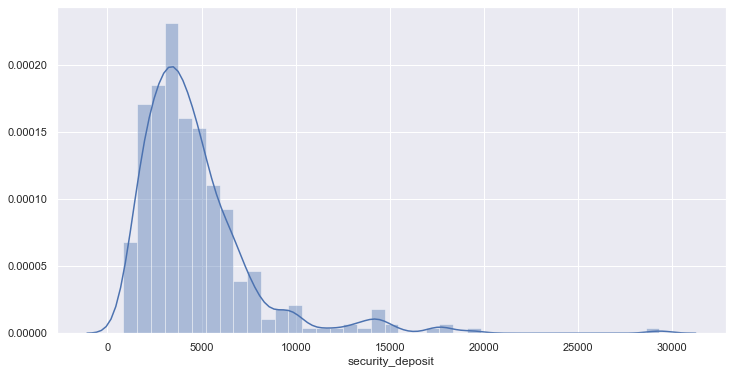

In [61]:
sns.distplot(df.security_deposit.dropna());

In [62]:
df.security_deposit.agg(['mean', 'median', 'std', 'min', 'max'])

mean       4670.031169
median     3900.000000
std        3153.089709
min         842.220000
max       29322.000000
Name: security_deposit, dtype: float64

#### Filling the missing values intuitively

 - https://www.immobilienscout24.de/expose/116573177: has all of it's data mising, *will assume three months*
 - https://www.immobilienscout24.de/expose/115925878: has only some of its data missing, *will assume scraping error and therefore three months*
 - https://www.immobilienscout24.de/expose/114437800: has only deposit missing, *will assume there is no deposit*
 
**Because the data is missing for different reasons, we should use different fill strategies**

In [63]:
df[df.security_deposit.isna()].head()

,url,region,condition,rooms,rent,year_construction,space,cold_rent,utilities,heating_costs,...,parking_space,renovated_date,property_condition,furnishing,heating_type,energy_sources,energy_certificate,type_of_certificate,energy_requirement,efficiency_class
3,https://www.immobilienscout24.de/expose/116573177,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.immobilienscout24.de/expose/115925878,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27,NaN,NaN,NaN,...,NaN,NaN,New,Gehobene Qualität,Central Heating,Fernwärme Energieausweis liegt zur Besichtigun...,liegt zur Besichtigung vor,NaN,NaN,NaN
6,https://www.immobilienscout24.de/expose/108376992,Mitte,mint_condition,2.0,1509.45,2015,61.61,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,https://www.immobilienscout24.de/expose/114437800,Mitte,first_time_use,4.0,2499.00,2019,125.20,1.999€,+500€,in,...,120€,NaN,New,NaN,Underfloor Heating,Fernwärme,NaN,Bedarfsausweis,NaN,B
11,https://www.immobilienscout24.de/expose/116205341,Kreuzberg,first_time_use,2.0,2328.00,2020,90.36,NaN,NaN,NaN,...,NaN,NaN,New,Gehobene Qualität,Central Heating,Fernwärme Energieausweis liegt zur Besichtigun...,liegt zur Besichtigung vor,NaN,NaN,NaN


In [71]:
# df['n_missing'] = df[df.columns[-14:]].isnull().sum(1)

df[df.columns[-14:]].isnull()#.sum()

,utilities,heating_costs,security_deposit,parking_space,renovated_date,property_condition,furnishing,heating_type,energy_sources,energy_certificate,type_of_certificate,energy_requirement,efficiency_class,n_missing
0,False,False,False,False,True,False,True,False,True,True,False,True,False,False
1,False,False,False,True,True,False,False,False,False,False,True,True,True,False
2,False,False,False,True,True,False,False,False,False,False,False,True,True,False
3,True,True,True,True,True,True,True,True,True,True,True,True,True,False
4,True,True,True,True,True,False,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,True,True,True,True,True,False,False,False,False,False,False,False,False,False
760,True,True,True,True,True,False,False,False,False,False,True,True,True,False
761,True,True,True,True,True,True,True,True,True,True,True,True,True,False
762,True,True,True,True,False,False,False,False,False,False,False,False,False,False


In [77]:
df.cold_rent.isna()

0      False
1      False
2      False
3       True
4       True
       ...  
759     True
760     True
761     True
762     True
763     True
Name: cold_rent, Length: 764, dtype: bool

In [66]:
df[(df.n_missing == 1) & (df.security_deposit.isnull())].head(3)

,url,region,condition,rooms,rent,year_construction,space,cold_rent,utilities,heating_costs,...,renovated_date,property_condition,furnishing,heating_type,energy_sources,energy_certificate,type_of_certificate,energy_requirement,efficiency_class,n_missing


In [78]:
def fill_missing_security_deposit(row):
    
    # if the value isn't missing, return the value
    if not pd.isna(row.security_deposit):
        return row.security_deposit
    
    # if there is only one missing value, return 0. Otherwise return 3 months of rent
    if row.n_missing == 1: return 0.
    else:                  return row.rent * 3

In [79]:
df['security_deposit'] = df.apply(fill_missing_security_deposit, axis = 1)

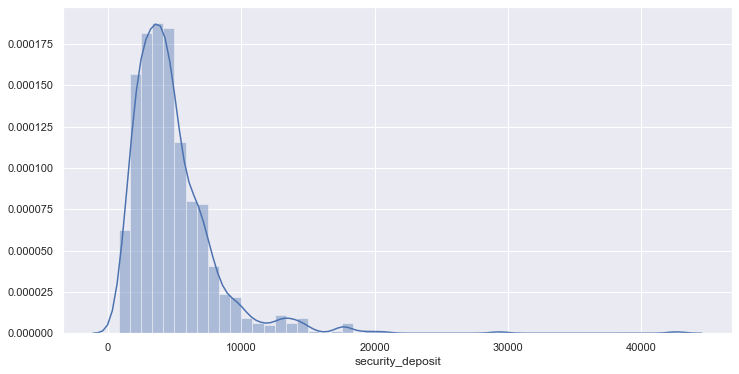

In [80]:
sns.distplot(df.security_deposit.dropna());

In [81]:
df.security_deposit.agg(['mean', 'median', 'std', 'min', 'max'])

mean       4854.710955
median     4197.000000
std        3295.911843
min         813.750000
max       42621.000000
Name: security_deposit, dtype: float64

In [82]:
df.security_deposit.isnull().sum()

0

In [ ]:
df.dropna()

In [ ]:
df.head()

## Recap:

 **Useful methods for dealing with missing data**:
 - `pd.isna(VALUE)` and  `pd.isnull(VALUE)`: check if a value is `NaN`, returns `boolean`
 - `df.COLUMN_NAME.isna()` and `df.COLUMN_NAME.isnull()`: check each value in column to see if it is `NaN`, returns `boolean`
 - `df.dropna()`: will drop **every** row that has a missing value
     - optional arguments:
         - `axis`: drop the column
         - `how`: `any` or `all` drop if `any` value is missing, or `all` values in that row/col are missing
 - `df.fillna(VALUE_TO_FILL_WITH)`: will fill every missing value (`NaN`) with the value of your choice
 
**NOTE**: na and null do the **exact** same thing in Pandas, even the docs are the same. The duplicate methods are carried over from `R` which treated `na` and `null` as different values.

## Clean `property_condition`

In [83]:
(df.isnull().sum() / len(df)).sort_values(ascending = False)

parking_space          0.882199
renovated_date         0.744764
efficiency_class       0.671466
energy_requirement     0.573298
cold_rent              0.442408
heating_costs          0.442408
utilities              0.442408
furnishing             0.417539
energy_certificate     0.409686
type_of_certificate    0.388743
energy_sources         0.353403
property_condition     0.344241
heating_type           0.325916
region                 0.000000
n_missing              0.000000
rooms                  0.000000
condition              0.000000
security_deposit       0.000000
rent                   0.000000
year_construction      0.000000
space                  0.000000
url                    0.000000
dtype: float64

In [84]:
df.head()

,url,region,condition,rooms,rent,year_construction,space,cold_rent,utilities,heating_costs,...,renovated_date,property_condition,furnishing,heating_type,energy_sources,energy_certificate,type_of_certificate,energy_requirement,efficiency_class,n_missing
0,https://www.immobilienscout24.de/expose/116051687,Mitte,first_time_use,4.0,2659.00,2019,117.20,2.199€,+460€,in,...,NaN,New,NaN,Underfloor Heating,NaN,NaN,Bedarfsausweis,NaN,B,5
1,https://www.immobilienscout24.de/expose/115338103,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33,"973,51€","+226,49€",in,...,NaN,New,Gehobene Qualität,Central Heating,Fernwärme Energieausweis liegt vor,liegt vor,NaN,NaN,NaN,5
2,https://www.immobilienscout24.de/expose/116458710,Köpenick,well_kept,2.0,979.00,1997,83.61,799€,+90€,+90€,...,NaN,Groomed,Normale Qualität,Central Heating,Fernwärme Energieausweis liegt vor,liegt vor,Verbrauchsausweis Energie­ver­brauchs­kennwert...,NaN,NaN,4
3,https://www.immobilienscout24.de/expose/116573177,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
4,https://www.immobilienscout24.de/expose/115925878,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27,NaN,NaN,NaN,...,NaN,New,Gehobene Qualität,Central Heating,Fernwärme Energieausweis liegt zur Besichtigun...,liegt zur Besichtigung vor,NaN,NaN,NaN,9


#### Categorical Features need to be handled differently than Continuous

Common methods:
 - Mode: May bias the dataset towards that category
 - Intuitive: Set the category based on domain knowledge, could be a problem if you are wrong
 - An `Unknown` Category: A catch all category for missing categories, especially useful if there is a reason the data is missing

In [44]:
df.property_condition.value_counts()

New                     241
Mint Condition          103
Groomed                  65
Refurbished              29
After Renovation         26
Completely Renovated     21
Modernized               13
Needs Renovation          2
Well Maintained           1
Name: property_condition, dtype: int64

In [85]:
df['property_condition'] = df.property_condition.fillna('Unknown')

In [87]:
df.property_condition.isnull().sum()

0

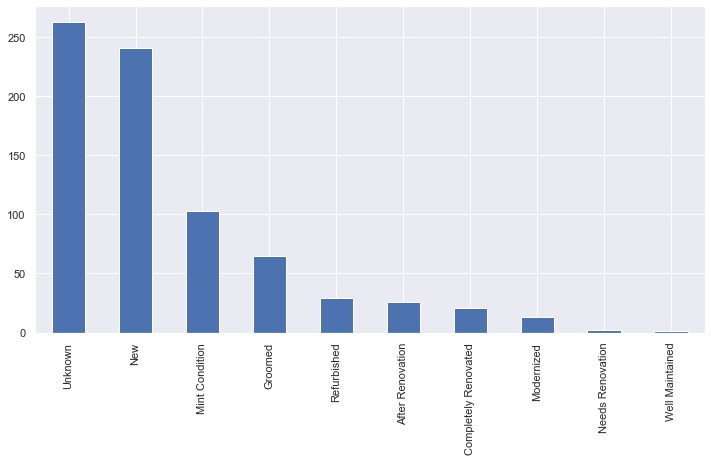

In [86]:
df.property_condition.value_counts().plot(kind = 'bar');

## Clean `cold_rent`

In [47]:
(df.isnull().sum() / len(df)).sort_values(ascending = False)

parking_space          0.882199
renovated_date         0.744764
efficiency_class       0.671466
energy_requirement     0.573298
cold_rent              0.442408
heating_costs          0.442408
utilities              0.442408
furnishing             0.417539
energy_certificate     0.409686
type_of_certificate    0.388743
energy_sources         0.353403
heating_type           0.325916
n_missing              0.000000
condition              0.000000
region                 0.000000
rent                   0.000000
rooms                  0.000000
security_deposit       0.000000
year_construction      0.000000
space                  0.000000
property_condition     0.000000
url                    0.000000
dtype: float64

**Since we have the warm rent for every sample, rather than use the median or mean, a better method might be to get the average warm/cold rent ratio and apply that to all missing values**

In [88]:
# reuse functions from before
df['cold_rent'] = df.cold_rent.apply(rm_euro).astype(str)
df['cold_rent'] = df.cold_rent.apply(convert_decimal)

In [91]:
total_warm_and_cold = df[['rent', 'cold_rent']].dropna().astype(float).sum()
total_warm_and_cold

rent         1351180.56
cold_rent     672957.80
dtype: float64

In [92]:
warm_cold_rent_ratio = total_warm_and_cold.cold_rent / total_warm_and_cold.rent
warm_cold_rent_ratio

0.4980517185652814

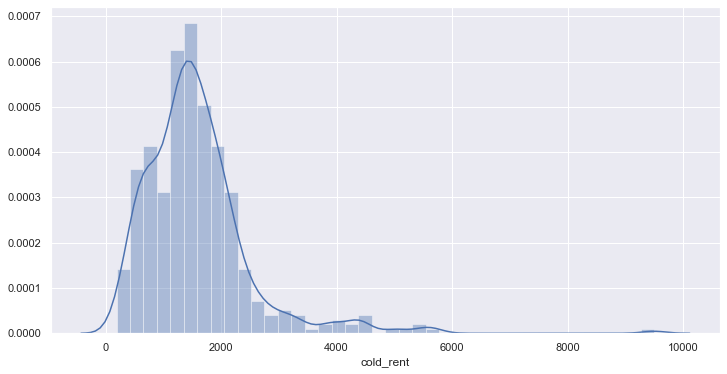

In [93]:
# current distribution
sns.distplot(df.cold_rent.astype(float).dropna());

In [94]:
df['cold_rent'] = df.cold_rent.astype(float)

In [95]:
def get_cold_rent(row):
    if not pd.isna(row.cold_rent): return float(row.cold_rent)
    else:
        return row.rent * warm_cold_rent_ratio

In [96]:
df['cold_rent'] = df.apply(get_cold_rent, axis = 1)

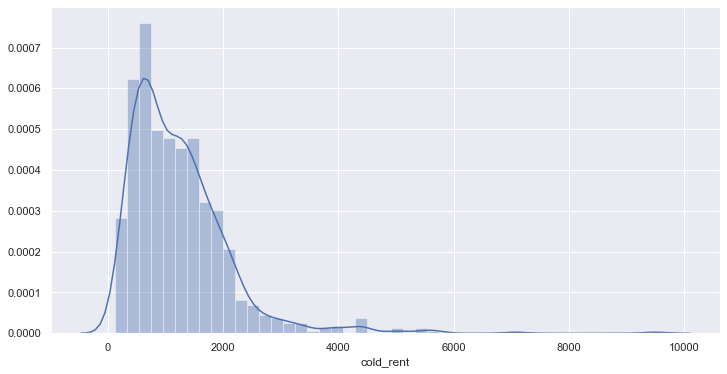

In [97]:
sns.distplot(df.cold_rent);

In [98]:
df.cold_rent.isnull().sum()

0

# Exercise: Clean up the rest `:)`

In [99]:
(df.isnull().sum() / len(df)).sort_values(ascending = False)

parking_space          0.882199
renovated_date         0.744764
efficiency_class       0.671466
energy_requirement     0.573298
heating_costs          0.442408
utilities              0.442408
furnishing             0.417539
energy_certificate     0.409686
type_of_certificate    0.388743
energy_sources         0.353403
heating_type           0.325916
n_missing              0.000000
rent                   0.000000
region                 0.000000
condition              0.000000
rooms                  0.000000
security_deposit       0.000000
year_construction      0.000000
space                  0.000000
cold_rent              0.000000
property_condition     0.000000
url                    0.000000
dtype: float64

In [101]:
# for feat in df.isnull().sum()[df.isnull().sum() > 0].index:
#     print(f'\n{feat}\n')
#     print(df[feat].unique())

## Clean `heating_costs`

In [102]:
df.heating_costs.unique()

array(['in', '+90€', nan, '+78€', '+80€', '+60€', 'inkl.', '+66,65€',
       '+95,87€', '+0€', '+56,42€', 'keine', '+85€', '+120€', 'nicht',
       '+200,86€', '+102,78€', '+123,56€', '+65€', '+151,71€', '+100€',
       '+104€', '+50€', '+70€', '+47€', '+53€', '+65,40€', '+250€',
       '+40€', '+125€', '+45€', '+30€', '+88€', '+63,52€', '+95€',
       '+90,14€', '+20€', '+110€', '+164€', '+150€', '+57,94€', '+148€',
       '+106€', '+66,81€', '+54,73€', '+102,38€', '+95,96€', '+64,73€',
       '+90,47€', '+89,19€', '+77€', '+105€', '+71,82€', '+115,70€',
       '+82,15€', '+87,43€', '+112,99€', '+133,42€', '+51,72€', '+140€',
       '+88,30€', '+100,65€', '+122,83€', '+95,34€', '+99,44€', '+66,60€',
       '+64,78€', '+66,31€', '+98,04€', '+91,04€', '+100,49€', '+98,70€',
       '+66,38€', '+96,73€', '+96,26€', '+65,35€', '+96,93€', '+96,97€',
       '+119,44€', '+86,06€', '+92,05€', '+107,26€', '+76,57€', '+81,96€',
       '+84,81€', '+81,67€', '+121,36€', '+84,98€', '+112,31€',
    

In [104]:
# reuse functions from before
df['heating_costs'] = df.heating_costs.apply(rm_euro).astype(str)
df['heating_costs'] = df.heating_costs.apply(convert_decimal)

In [108]:
df.heating_costs.unique()

array(['in', '+90', 'nan', '+78', '+80', '+60', 'inkl', '+66.65',
       '+95.87', 0.0, '+56.42', 'keine', '+85', 120.0, 'nicht', '+200.86',
       '+102.78', '+123.56', '+65', '+151.71', 100.0, 104.0, '+50', '+70',
       '+47', '+53', '+65.40', 250.0, '+40', 125.0, '+45', '+30', '+88',
       '+63.52', '+95', '+90.14', '+20', 110.0, 164.0, 150.0, '+57.94',
       148.0, 106.0, '+66.81', '+54.73', '+102.38', '+95.96', '+64.73',
       '+90.47', '+89.19', '+77', 105.0, '+71.82', '+115.70', '+82.15',
       '+87.43', '+112.99', '+133.42', '+51.72', 140.0, '+88.30',
       '+100.65', '+122.83', '+95.34', '+99.44', '+66.60', '+64.78',
       '+66.31', '+98.04', '+91.04', '+100.49', '+98.70', '+66.38',
       '+96.73', '+96.26', '+65.35', '+96.93', '+96.97', '+119.44',
       '+86.06', '+92.05', '+107.26', '+76.57', '+81.96', '+84.81',
       '+81.67', '+121.36', '+84.98', '+112.31', '+101.52', '+81.65',
       '+98.02', '+129.67', '+81.95', '+81.72', '+92.42', '+92.56',
       '+93.97', '